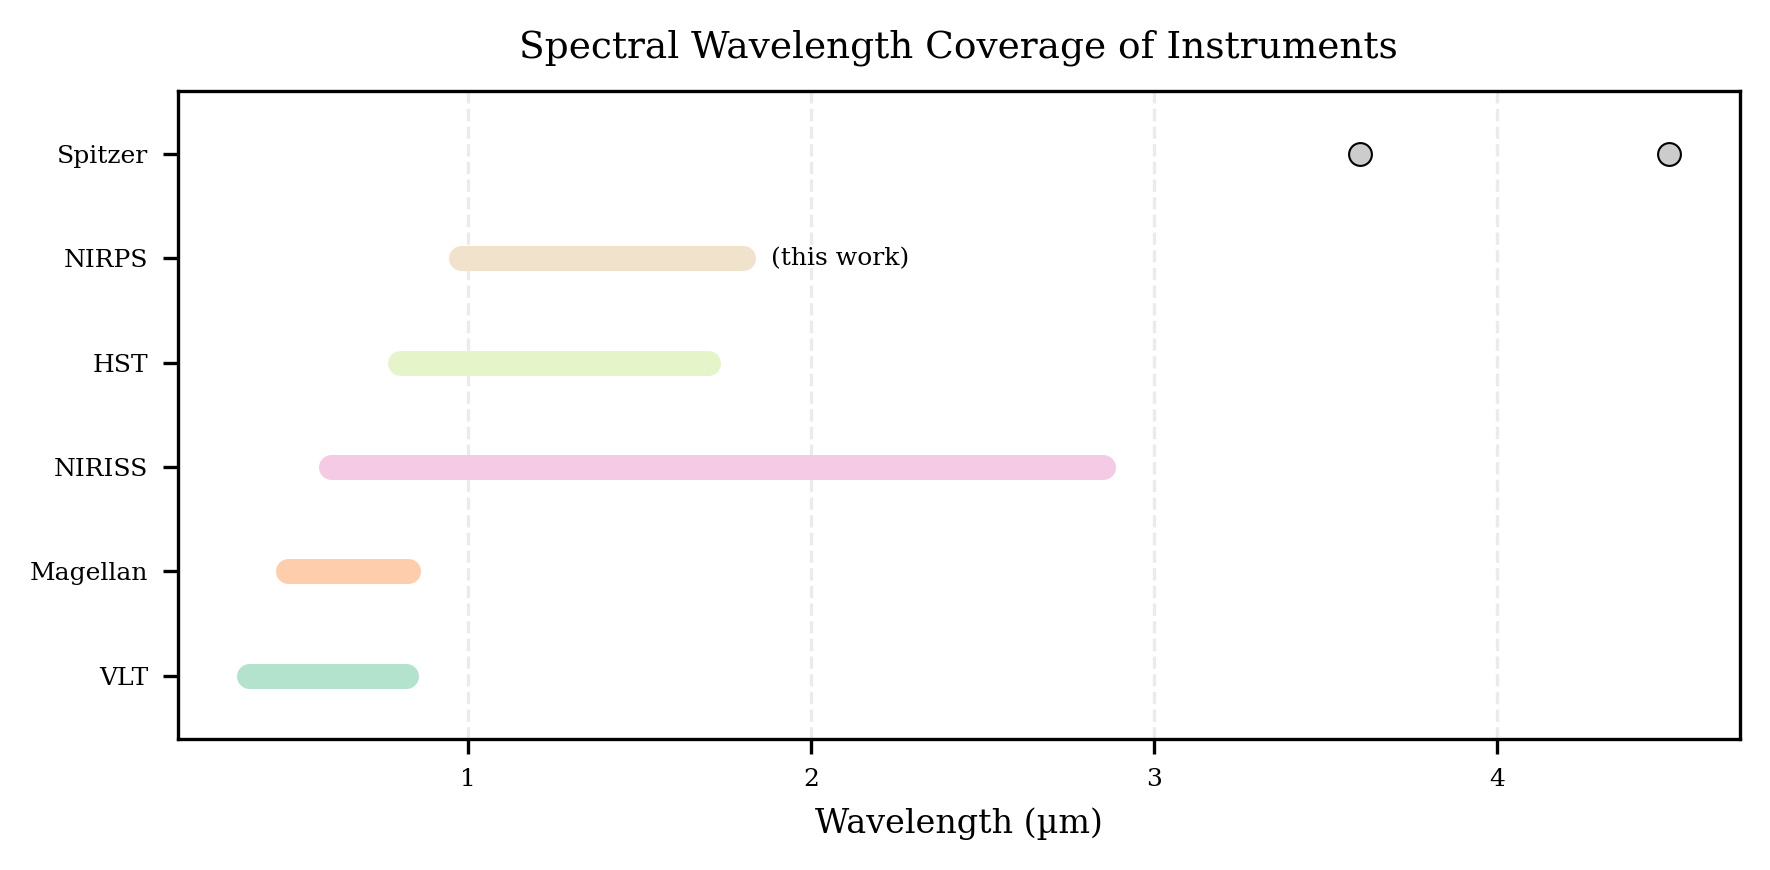

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations

def plot_spectral_coverage(instruments,
                           save_prefix="spectral_coverage_pastel",
                           highlight_overlaps=False,
                           figsize=(6, 3),
                           colormap="Pastel1",
                           y_padding=0.6,
                           save_plot=False,
                           this_work=None):  
    """
    instruments: dict
        {"InstrumentName": [(start_um, end_um), ...]}
    y_padding: float
        Extra vertical space above and below bars
    """

    # ---- Font Styling ----
    plt.rcParams.update({
        "font.family": "serif",   # change here if desired
        "font.size": 10,
        "axes.titlesize": 9,
        "axes.labelsize": 8,
        "xtick.labelsize": 6,
        "ytick.labelsize": 6
    })

    fig = plt.figure(figsize=figsize, dpi=300)

    # Sort instruments by minimum wavelength
    instruments_sorted = dict(
        sorted(instruments.items(), key=lambda x: min(r[0] for r in x[1]))
    )

    instrument_names = list(instruments_sorted.keys())
    n_inst = len(instrument_names)

    # Generate pastel colors automatically
    cmap = plt.get_cmap(colormap)
    colors = [cmap(i / max(n_inst - 1, 1)) for i in range(n_inst)]

    y_positions = np.arange(n_inst)

    # Plot coverage
    for idx, ((instrument, ranges), y) in enumerate(zip(instruments_sorted.items(), y_positions)):

        for r in ranges:
            if r[0] != r[1]:  # range
                plt.plot(r,
                         [y, y],
                         linewidth=6,
                         solid_capstyle='round',
                         color=colors[idx])
            else:  # single wavelength point
                plt.scatter(r[0],
                            y,
                            s=30,
                            color=colors[idx],
                            edgecolor='black',
                            linewidth=0.5,
                            zorder=3)

    # Y labels
    plt.yticks(y_positions, instrument_names)

    # Add vertical padding
    plt.ylim(-y_padding, n_inst - 1 + y_padding)

    # Automatic wavelength limits
    all_ranges = [r for ranges in instruments_sorted.values() for r in ranges]
    min_wave = min(r[0] for r in all_ranges)
    max_wave = max(r[1] for r in all_ranges)
    margin = 0.05 * (max_wave - min_wave)
    plt.xlim(min_wave - margin, max_wave + margin)

    # Highlight overlaps
    if highlight_overlaps:
        for (inst1, ranges1), (inst2, ranges2) in combinations(instruments_sorted.items(), 2):
            for r1 in ranges1:
                for r2 in ranges2:
                    overlap_start = max(r1[0], r2[0])
                    overlap_end = min(r1[1], r2[1])
                    if overlap_start < overlap_end:
                        plt.axvspan(overlap_start,
                                    overlap_end,
                                    alpha=0.08,
                                    color="grey")
                        

    if this_work is not None and this_work in instruments_sorted:

        # Find y position
        idx = instrument_names.index(this_work)
        y = y_positions[idx]

        # Find rightmost wavelength of that instrument
        max_wave_inst = max(r[1] for r in instruments_sorted[this_work])

        # Small horizontal offset
        x_offset = 0.02 * (max_wave - min_wave)

        plt.text(max_wave_inst + x_offset,
                 y,
                 "(this work)",
                 va='center',
                 ha='left',
                 fontsize=6)
                #  bbox=dict(boxstyle="round,pad=0.2",
                #            facecolor="white",
                #            edgecolor="black",
                #            linewidth=0.5))

    plt.xlabel("Wavelength (µm)")
    plt.title("Spectral Wavelength Coverage of Instruments", pad=8)

    plt.grid(axis='x', linestyle='--', alpha=0.25)
    plt.tight_layout()

    if save_plot:
        plt.savefig(f"{save_prefix}.png", dpi=300, bbox_inches='tight')
        plt.savefig(f"{save_prefix}.pdf", bbox_inches='tight')

    plt.show()


# =====================
# Example usage
# =====================

instruments = {
    "VLT": [(0.36, 0.82)],
    "NIRISS": [(0.6, 2.85)],
    "Spitzer": [(3.6, 3.6), (4.5, 4.5)],
    "HST": [(0.8, 1.15), (1.075, 1.7)],
    "NIRPS": [(0.98, 1.8)],
    "Magellan": [(0.475, 0.825)]
}

plot_spectral_coverage(instruments, colormap="Pastel2", y_padding=0.6, this_work="NIRPS")
